# Class Challenge: Image Classification of COVID-19 X-rays
# Task 1 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Binary Classification: COVID-19 vs. Normal

In [ ]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.4.1'

#### Load Image Data

In [ ]:
DATA_LIST = os.listdir('two/train')
DATASET_PATH  = 'two/train'
TEST_DIR =  'two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 8  
NUM_EPOCHS    = 40
LEARNING_RATE = 0.0007 

#### Generate Training and Validation Batches

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

D:\downloads\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [ ]:

vgg_model = tf.keras.applications.VGG16(
    weights = "imagenet",
    input_shape = (224, 224, 3),
    include_top = False
)

vgg_model.trainable = False

model = tf.keras.models.Sequential()
model.add(vgg_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(rate = 0.5))
model.add(tf.keras.layers.Dense(256, name = "dense_feature"))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_feature (Dense)        (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


#### [5 points] Train Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr = LEARNING_RATE, momentum = 0.9),
              loss='binary_crossentropy', 
              metrics=['acc'])
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size


history = model.fit(
    train_batches, 
    epochs=NUM_EPOCHS, steps_per_epoch=STEP_SIZE_TRAIN, 
    batch_size=BATCH_SIZE, 
    validation_data = valid_batches, validation_steps=STEP_SIZE_VALID
)

13
4
Epoch 1/40
13/13 [==============================] - 14s 1s/step - loss: 1.0473 - acc: 0.5205 - val_loss: 0.4219 - val_acc: 0.7917
Epoch 2/40
13/13 [==============================] - 14s 1s/step - loss: 1.4690 - acc: 0.6197 - val_loss: 1.7732 - val_acc: 0.5417
Epoch 3/40
13/13 [==============================] - 14s 1s/step - loss: 2.3286 - acc: 0.6026 - val_loss: 0.0952 - val_acc: 1.0000
Epoch 4/40
13/13 [==============================] - 14s 1s/step - loss: 1.3947 - acc: 0.6213 - val_loss: 0.1366 - val_acc: 0.9583
Epoch 5/40
13/13 [==============================] - 14s 1s/step - loss: 1.2291 - acc: 0.7435 - val_loss: 0.0889 - val_acc: 0.9583
Epoch 6/40
13/13 [==============================] - 14s 1s/step - loss: 0.4377 - acc: 0.8310 - val_loss: 0.1180 - val_acc: 0.9583
Epoch 7/40
13/13 [==============================] - 13s 1s/step - loss: 0.3942 - acc: 0.8828 - val_loss: 0.0402 - val_acc: 1.0000
Epoch 8/40
13/13 [==============================] - 14s 1s/step - loss: 0.6177 - acc:

#### [5 points] Plot Accuracy and Loss During Training

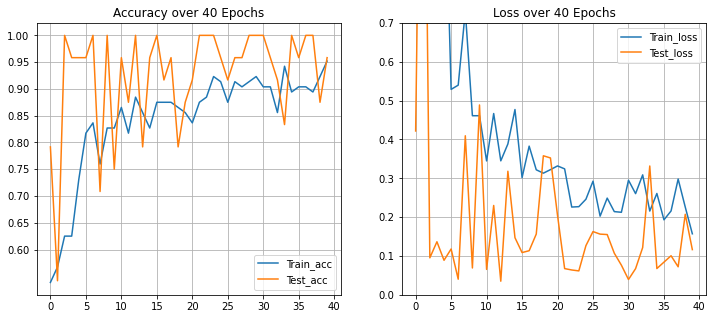

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 5]
fig, (ax1, ax2) = plt.subplots(1, 2)


ax1.plot(history.history['acc'], label = 'Train_acc')
ax1.plot(history.history['val_acc'], label = 'Test_acc')
ax1.set_title("Accuracy over 40 Epochs")
ax1.legend(['Train_acc','Test_acc'])
ax1.grid()
ax1.set_yticks([0.6, 0.65,0.7,0.75,0.8,0.85,0.9,0.95,1])

ax2.plot(history.history['loss'], label = 'Train_loss')
ax2.plot(history.history['val_loss'], label = 'Test_loss')
ax2.set_title("Loss over 40 Epochs")
ax2.legend(['Train_loss','Test_loss'])
ax2.set_ylim([0,0.7])
ax2.grid()


plt.show()



#### Plot Test Results

Found 18 images belonging to 2 classes.


D:\downloads\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


18/18 [==============================] - 3s 136ms/step
covid\nejmoa2001191_f3-PA.jpeg


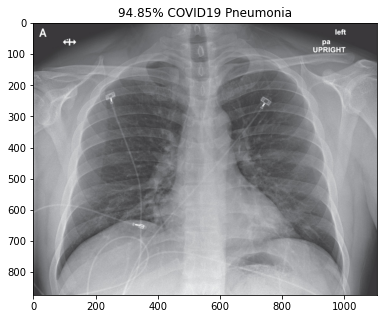

covid\nejmoa2001191_f4.jpeg


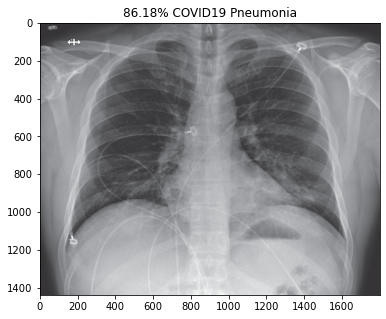

covid\nejmoa2001191_f5-PA.jpeg


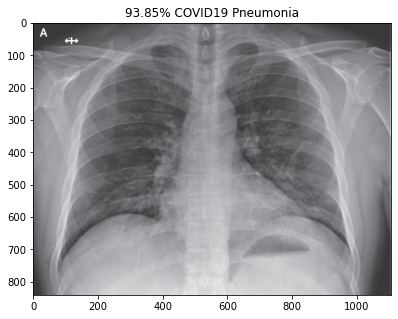

covid\radiol.2020200490.fig3.jpeg


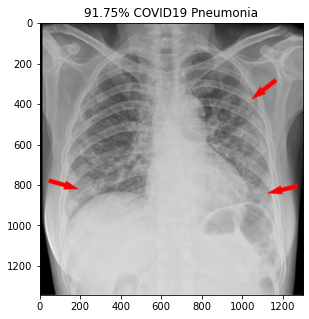

covid\ryct.2020200028.fig1a.jpeg


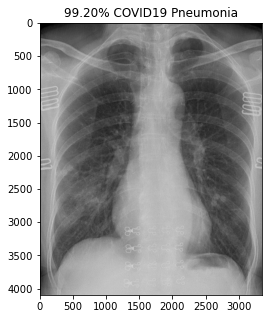

covid\ryct.2020200034.fig2.jpeg


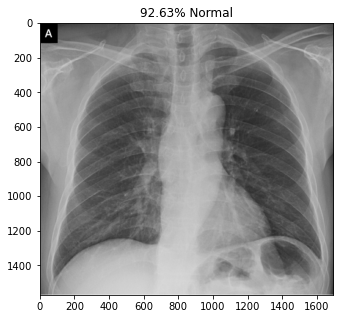

covid\ryct.2020200034.fig5-day0.jpeg


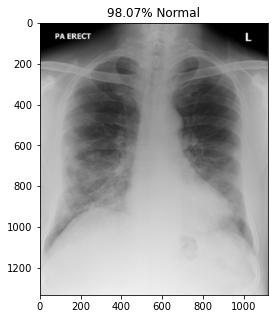

covid\ryct.2020200034.fig5-day4.jpeg


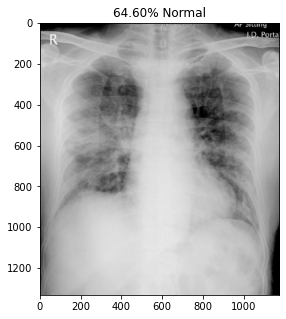

covid\ryct.2020200034.fig5-day7.jpeg


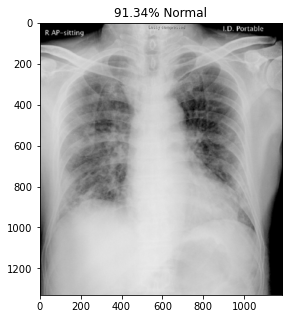

normal\NORMAL2-IM-1385-0001.jpeg


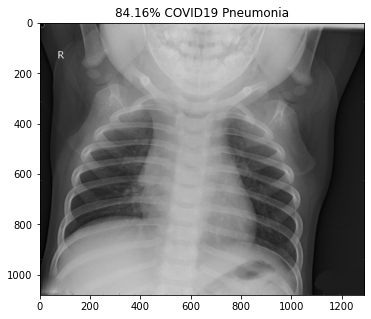

normal\NORMAL2-IM-1396-0001.jpeg


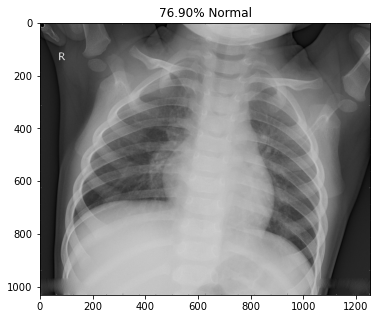

normal\NORMAL2-IM-1400-0001.jpeg


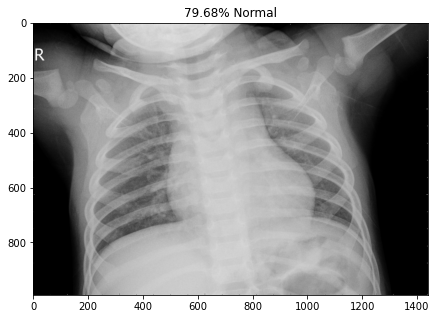

normal\NORMAL2-IM-1401-0001.jpeg


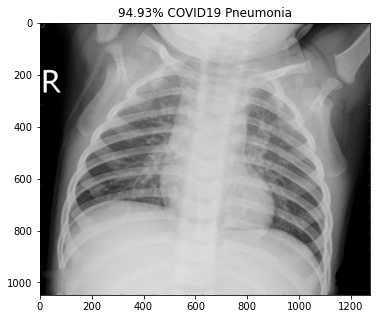

normal\NORMAL2-IM-1406-0001.jpeg


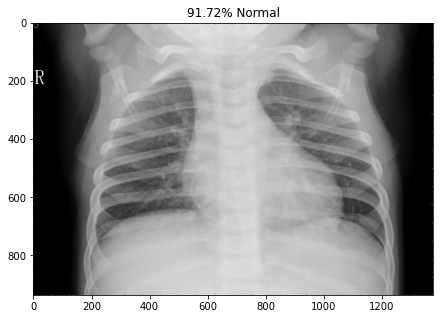

normal\NORMAL2-IM-1412-0001.jpeg


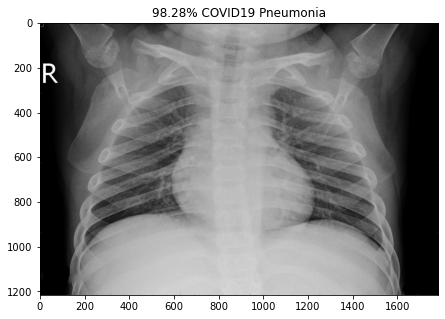

normal\NORMAL2-IM-1419-0001.jpeg


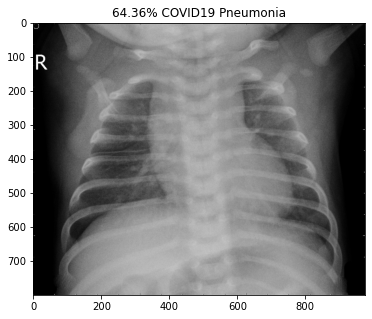

normal\NORMAL2-IM-1422-0001.jpeg


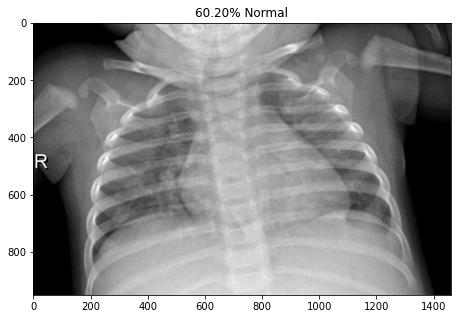

normal\NORMAL2-IM-1423-0001.jpeg


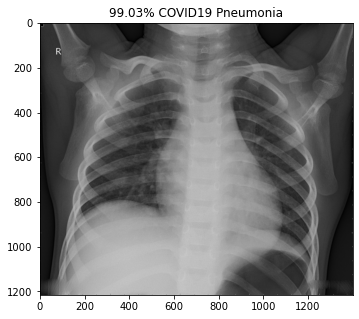

In [ ]:
import matplotlib.image as mpimg

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="binary")
eval_generator.reset()
pred = model.predict_generator(eval_generator,18,verbose=1)
for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 130 images belonging to 2 classes.


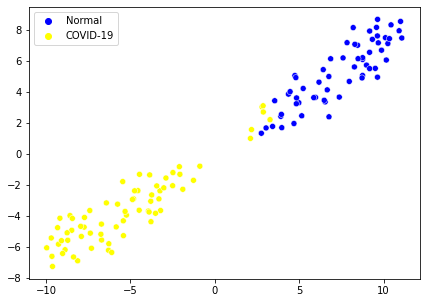

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                        outputs=model.get_layer('dense_feature').output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")


plt.rcParams['figure.figsize'] = [7, 5]

intermediate_output = intermediate_layer_model.predict(tsne_data_generator)
tsne = TSNE(n_components=2)
results = tsne.fit_transform(intermediate_output)
h = tsne_data_generator.labels
sns.scatterplot(x = results[:,0], y = results[:,1], legend = 'full', hue= h, palette=["blue", "yellow"])


L=plt.legend()
L.get_texts()[0].set_text('Normal')
L.get_texts()[1].set_text('COVID-19')



<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->